Steps and Explainations:
Hi all, below are my explaination of the process I took to build this model and the issues I encountered. I will include training and testing stats in the steps below.

In [ ]:
# import necessary packages
import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import pandas as pd
import seaborn as sn

from keras.engine import Model
from keras.models import Sequential
from keras.layers import Convolution2D, ZeroPadding2D, Activation, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import img_to_array

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split

Step 0:
Since both race and gender model is based on a pre-trained model, I created a function to select which model to train and to define the apporiate training params

In [ ]:
def build_model(model_type, sample_size_per_group, split, epoch, num_of_batches, epoch_patience):

Step 1:
This step extracts data from the images provided. The images are resized, converted to a vector, and stored in a list. Two additional lists are created to include the labels for the images based on the folder where they reside.
    
Now due to the limitation of my machines at home, I have to down sample the dataset because my machine either takes too long to train or will eventually run out of memory. To do this, I randomly select a subset of images from each group to be imported. This also addresses the issue of unbalanced classes because each class will now contain the same number of data. 

In [ ]:
    # extract data from image
    print('Extracting data from images...')
    
    X = []
    y_race = []
    y_gender = []
    
    image_files = []
    image_sample = []
    
    race = ['asian', 'black', 'indian', 'latino', 'white']
    gender = ['man', 'woman']
    
    image_files = os.listdir('images/asianman')
    image_sample = random.sample(image_files, sample_size_per_group)
    for filename in image_sample:
        if 'jpg' in filename:
            image = cv2.imread('images/asianman/' + filename)
            image = cv2.resize(image, (224,224))
            image = img_to_array(image)
            X.append(image)
            y_gender.append('man')
            y_race.append('asian')
    
    image_files = os.listdir('images/asianwoman')
    image_sample = random.sample(image_files, sample_size_per_group)
    for filename in image_sample:
        if 'jpg' in filename:
            image = cv2.imread('images/asianwoman/' + filename)
            image = cv2.resize(image, (224,224))
            image = img_to_array(image)
            X.append(image)
            y_gender.append('woman')
            y_race.append('asian')
    
    image_files = os.listdir('images/blackman')
    image_sample = random.sample(image_files, sample_size_per_group)
    for filename in image_sample:
        if 'jpg' in filename:
            image = cv2.imread('images/blackman/' + filename)
            image = cv2.resize(image, (224,224))
            image = img_to_array(image)
            X.append(image)
            y_gender.append('man')
            y_race.append('black')
    
    image_files = os.listdir('images/blackwoman')
    image_sample = random.sample(image_files, sample_size_per_group)
    for filename in image_sample:
        if 'jpg' in filename:
            image = cv2.imread('images/blackwoman/' + filename)
            image = cv2.resize(image, (224,224))
            image = img_to_array(image)
            X.append(image)
            y_gender.append('woman')
            y_race.append('black')
            
    image_files = os.listdir('images/indianman')
    image_sample = random.sample(image_files, sample_size_per_group)
    for filename in image_sample:
        if 'jpg' in filename:
            image = cv2.imread('images/indianman/' + filename)
            image = cv2.resize(image, (224,224))
            image = img_to_array(image)
            X.append(image)
            y_gender.append('man')
            y_race.append('indian')
                
    image_files = os.listdir('images/indianwoman')
    image_sample = random.sample(image_files, sample_size_per_group)
    for filename in image_sample:
        if 'jpg' in filename:
            image = cv2.imread('images/indianwoman/' + filename)
            image = cv2.resize(image, (224,224))
            image = img_to_array(image)
            X.append(image)
            y_gender.append('woman')
            y_race.append('indian')
          
    image_files = os.listdir('images/latinoman')
    image_sample = random.sample(image_files, sample_size_per_group)
    for filename in image_sample:
        if 'jpg' in filename:
            image = cv2.imread('images/latinoman/' + filename)
            image = cv2.resize(image, (224,224))
            image = img_to_array(image)
            X.append(image)
            y_gender.append('man')
            y_race.append('latino')
    
    image_files = os.listdir('images/latinowoman')
    image_sample = random.sample(image_files, sample_size_per_group)
    for filename in image_sample:
        if 'jpg' in filename:
            image = cv2.imread('images/latinowoman/' + filename)
            image = cv2.resize(image, (224,224))
            image = img_to_array(image) 
            X.append(image)
            y_gender.append('woman')
            y_race.append('latino')
         
    image_files = os.listdir('images/whiteman')
    image_sample = random.sample(image_files, sample_size_per_group)
    for filename in image_sample:
        if 'jpg' in filename:
            image = cv2.imread('images/whiteman/' + filename)
            image = cv2.resize(image, (224,224))
            image = img_to_array(image)     
            X.append(image)
            y_gender.append('man')
            y_race.append('white')
          
    image_files = os.listdir('images/whitewoman')
    image_sample = random.sample(image_files, sample_size_per_group)
    for filename in image_sample:
        if 'jpg' in filename:
            image = cv2.imread('images/whitewoman/' + filename)
            image = cv2.resize(image, (224,224))
            image = img_to_array(image)
            X.append(image)
            y_gender.append('woman')
            y_race.append('white')

Step 2:
This is a standard step where I normalize the data, encode the labels, transform them to vectors and split them into train/test. 

In [ ]:
    # prepare the data
    print('Processing data...')
    
    X = np.array(X, dtype="float") / 255.0
    y_gender = np.array(y_gender)
    y_race = np.array(y_race)
    
    enc_race = preprocessing.LabelEncoder()
    enc_gender = preprocessing.LabelEncoder()
    
    enc_race.fit(race)
    enc_gender.fit(gender)
    
    y_race = enc_race.transform(y_race)
    y_gender = enc_gender.transform(y_gender)
    
    y_race = to_categorical(y_race, num_classes = len(race))
    y_gender = to_categorical(y_gender, num_classes = len(gender))
    
    X_gender_train, X_gender_test, y_gender_train, y_gender_test = train_test_split(X, y_gender, test_size = 0.25, random_state = 42)
    
    X_race_train, X_race_test, y_race_train, y_race_test = train_test_split(X, y_race, test_size = 0.25, random_state = 42)

Step 3:
Here I load a pre-trained face detection mode and its weights. This model is used for face recognition and feature extraction. These layers are locked and will not be train by the models below

In [ ]:
    # build model
    print('Loading face model...')
    
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
     
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
     
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
     
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
     
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
     
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    
    model.load_weights('vgg_face_weights.h5')
    
    kfold = KFold(n_splits = split, shuffle = True)
    early_stop = EarlyStopping(monitor = 'loss', patience = epoch_patience)
    
    for layer in model.layers[:-7]:
        layer.trainable = False

Step 4:
Here I build and train the model for gender detection. The training uses a kfold cross validation and the model with the best evaluation accuracy is selected as the final model. Due to the limitation of my machine the number of folder, epoch, and batch size are limited to a small number (see build_model.py for parameters). An early stopping is used to prevent overfitting, it does so by monitoring the training loss and stoping after 3 epochs of unimproved loss. The stats below showed good resuslts for this model as shown in the confusion matrix below. However The training loss stop decreasing after some epochs and started increasing, this is likely due to the learning rate being too large at this point and causing the gradient to not converge. Vanishing/Exploding Gradient can also cause this issue but will need more epochs to observe. 

In [ ]:
    # gender model
    if  model_type == 'gender':
        print('Building gender model...')
        i = 0
        gender_model = [None] * split
        gender_model_train = [None] * split
        gender_model_evaluate = [None] * split
        
        for train, test in kfold.split(X_gender_train, y_gender_train):
            print('Training model ' + str(i) + '...')
            gender_model_output = Sequential()
            gender_model_output = Convolution2D(len(gender), (1, 1), name = 'predictions')(model.layers[-4].output)
            gender_model_output = Flatten()(gender_model_output)
            gender_model_output = Activation('softmax')(gender_model_output)
            
            gender_model[i] = Model(inputs = model.input, outputs = gender_model_output)
            
            gender_model[i].compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
            
            gender_model_train[i] = gender_model[i].fit(X[train], y_gender[train],
                                                  validation_data = (X_gender_train[test], y_gender_train[test]),
                                                  batch_size = len(X_gender_train[train])//num_of_batches,
                                                  epochs = epoch, callbacks = [early_stop], verbose = 1)
            
            print('Evaluating model ' + str(i) + '...')
            gender_model_evaluate[i] = gender_model[i].evaluate(X_gender_test, y_gender_test, batch_size = len(X_gender_train[train])//num_of_batches)
            
            i += 1
        
        best_model = 0
        for m in range (len(gender_model_evaluate) - 1):
            if gender_model_evaluate[m][1] > gender_model_evaluate[m + 1][1]:
                best_model = m
             
        gender_model[m].save('gender_model.h5')
        gender_model[m].save_weights("gender_model_weights.h5")
        
        plt.title('Gender Model Loss')
        plt.plot(gender_model_train[0].history['loss'], label = 'train')
        plt.plot(gender_model_train[0].history['val_loss'], label = 'val')
        plt.legend(loc='upper right')
        plt.savefig('gender_model_loss.png')
        plt.show()
        
        plt.title('Gender Model Accuracy')
        plt.plot(gender_model_train[0].history['accuracy'], label = 'train')
        plt.plot(gender_model_train[0].history['val_accuracy'], label = 'val')
        plt.legend(loc='upper right')
        plt.savefig('gender_model_accuracy.png')
        plt.show()
        
        np.savetxt('gender_model_evaluation.txt', gender_model_evaluate[0])
        print ('Test Loss, Test Accuracy:', gender_model_evaluate[0])
        
        gender_predicted = gender_model[0].predict(X_gender_test)
        gender_predicted_class = []
        gender_actual_class = []
        
        for p in range (0, len(gender_predicted)):
            gender_predicted_class.append(gender[np.argmax(gender_predicted[p])])
            gender_actual_class.append(gender[np.argmax(y_gender_test[p])])
        
        cm = confusion_matrix(gender_actual_class, gender_predicted_class, gender)
        
        df_cm = pd.DataFrame(cm, index = gender, columns = gender)
        sn.heatmap(df_cm, annot=True)
        plt.title('Gender Confusion Matrix')
        plt.ylabel('True')
        plt.xlabel('Predicted')
        plt.savefig('gender_model_cm.png')
        plt.show()

Extracting data from images...
Processing data...
Loading face model...
Building gender model...
Training model 0...
Train on 1000 samples, validate on 500 samples
Epoch 1/10
1000/1000 [==============================] - 488s 488ms/step - loss: 0.6629 - accuracy: 0.7290 - val_loss: 0.2740 - val_accuracy: 0.8800
Epoch 2/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.1682 - accuracy: 0.9450 - val_loss: 0.1706 - val_accuracy: 0.9640
Epoch 3/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.1009 - accuracy: 0.9750 - val_loss: 0.1114 - val_accuracy: 0.9660
Epoch 4/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0532 - accuracy: 0.9870 - val_loss: 0.1135 - val_accuracy: 0.9600
Epoch 5/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0150 - accuracy: 0.9930 - val_loss: 0.1441 - val_accuracy: 0.9560
Epoch 6/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0071 - accuracy: 0.9990 - val_loss: 0.1410 - val_accuracy: 0.9640
Epoch 7/10
1000/1000 [==============================] - 482s 482ms/step - loss: 0.0111 - accuracy: 0.9970 - val_loss: 0.1270 - val_accuracy: 0.9700
Epoch 8/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.1220 - val_accuracy: 0.9780
Epoch 9/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.1230 - val_accuracy: 0.9800
Epoch 10/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0126 - accuracy: 0.9950 - val_loss: 0.1425 - val_accuracy: 0.9720
Evaluating model 0...
500/500 [==============================] - 93s 186ms/step
Training model 1...
Train on 1000 samples, validate on 500 samples
Epoch 1/10
1000/1000 [==============================] - 483s 483ms/step - loss: 0.2041 - accuracy: 0.9270 - val_loss: 0.1385 - val_accuracy: 0.9720
Epoch 2/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.1357 - accuracy: 0.9690 - val_loss: 0.1645 - val_accuracy: 0.9640
Epoch 3/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0887 - accuracy: 0.9790 - val_loss: 0.0819 - val_accuracy: 0.9660
Epoch 4/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0421 - accuracy: 0.9890 - val_loss: 0.0412 - val_accuracy: 0.9860
Epoch 5/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0357 - accuracy: 0.9910 - val_loss: 0.0315 - val_accuracy: 0.9880
Epoch 6/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0225 - accuracy: 0.9960 - val_loss: 0.0394 - val_accuracy: 0.9880
Epoch 7/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0144 - accuracy: 0.9970 - val_loss: 0.0339 - val_accuracy: 0.9900
Epoch 8/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0118 - accuracy: 0.9960 - val_loss: 0.0460 - val_accuracy: 0.9880
Epoch 9/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.0467 - val_accuracy: 0.9900
Epoch 10/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0583 - val_accuracy: 0.9860
Evaluating model 1...
500/500 [==============================] - 93s 185ms/step
Training model 2...
Train on 1000 samples, validate on 500 samples
Epoch 1/10
1000/1000 [==============================] - 503s 503ms/step - loss: 0.1382 - accuracy: 0.9360 - val_loss: 0.0586 - val_accuracy: 0.9920
Epoch 2/10
1000/1000 [==============================] - 505s 505ms/step - loss: 0.0130 - accuracy: 0.9950 - val_loss: 0.0674 - val_accuracy: 0.9900
Epoch 3/10
1000/1000 [==============================] - 494s 494ms/step - loss: 0.0306 - accuracy: 0.9910 - val_loss: 0.0628 - val_accuracy: 0.9940
Epoch 4/10
1000/1000 [==============================] - 488s 488ms/step - loss: 0.0261 - accuracy: 0.9900 - val_loss: 0.0629 - val_accuracy: 0.9920
Epoch 5/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0302 - accuracy: 0.9940 - val_loss: 0.0878 - val_accuracy: 0.9900
Evaluating model 2...
500/500 [==============================] - 93s 185ms/step

Test Loss, Test Accuracy: [0.1263430304825306, 0.9739999771118164]

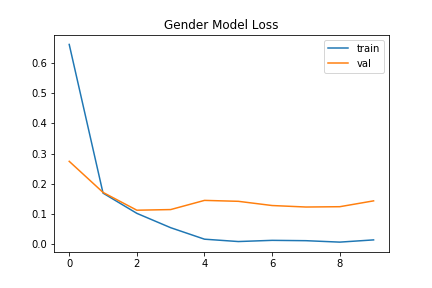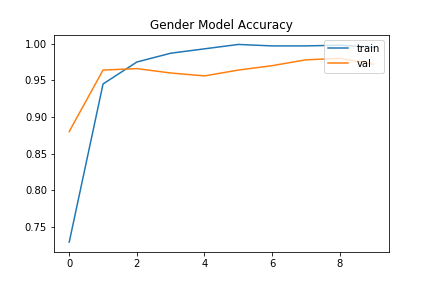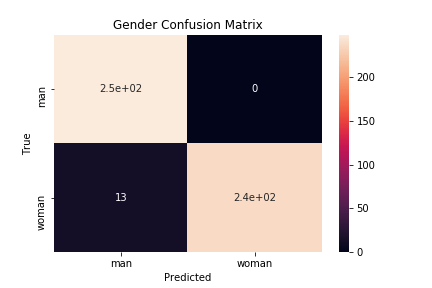

Step 5:
Here I build and train the model for race detection. The training uses a kfold cross validation and the model with the best evaluation accuracy is selected as the final model. Again due to the limitation of my machine the number of folder, epoch, and batch size are limited to a small number (see build_model.py for parameters). An early stopping is used to prevent overfitting, it does so by monitoring the training loss and stoping after 3 epochs of unimproved loss. The stats below showed poor resuslts for latino and indian as shown in the confusion matrix below. This is likely due to the similar skin color of the two groups. Again The training loss stop decreasing after some epochs and started increasing, this is likely due to the learning rate being too large at this point and causing the gradient to not converge. Vanishing/Exploding Gradient can also cause this issue but will need more epochs to observe. 

In [ ]:
    # race model
    if  model_type == 'race':
        print('Building race model...')
        i = 0
        race_model = [None] * split
        race_model_train = [None] * split
        race_model_evaluate = [None] * split
        
        for train, test in kfold.split(X_race_train, y_race_train):
            print('Training model ' + str(i) + '...')
            race_model_output = Sequential()
            race_model_output = Convolution2D(len(race), (1, 1), name = 'predictions')(model.layers[-4].output)
            race_model_output = Flatten()(race_model_output)
            race_model_output = Activation('softmax')(race_model_output)
            
            race_model[i] = Model(inputs = model.input, outputs = race_model_output)
            
            race_model[i].compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])
            
            race_model_train[i] = race_model[i].fit(X_race_train[train], y_race_train[train],
                                              validation_data = (X_race_train[test], y_race_train[test]),
                                              batch_size = len(X_race_train[train])//num_of_batches,
                                              epochs = epoch, callbacks = [early_stop], verbose = 1)
            
            print('Evaluating model ' + str(i) + '...')
            race_model_evaluate[i] = race_model[i].evaluate(X_race_test, y_race_test, batch_size = len(X_race_train[train])//num_of_batches)
            
            i += 1
        
        best_model = 0
        for m in range (len(race_model_evaluate) - 1):
            if race_model_evaluate[m][1] > race_model_evaluate[m + 1][1]:
                best_model = m
        
        race_model[m].save('race_model.h5')
        race_model[m].save_weights("race_model_weights.h5")
        
        plt.title('Race Model Loss')
        plt.plot(race_model_train[best_model].history['loss'], label = 'train')
        plt.plot(race_model_train[best_model].history['val_loss'], label = 'val')
        plt.legend(loc='upper right')
        plt.savefig('race_model_loss.png')
        plt.show()

        plt.title('Race Model Accuracy')
        plt.plot(race_model_train[best_model].history['accuracy'], label = 'train')
        plt.plot(race_model_train[best_model].history['val_accuracy'], label = 'val')
        plt.legend(loc='upper right')
        plt.savefig('race_model_accuracy.png')
        plt.show()

        np.savetxt('race_model_evaluation.txt', race_model_evaluate[0])
        print ('Test Loss, Test Accuracy:', race_model_evaluate[best_model])
        
        race_predicted = race_model[best_model].predict(X_race_test)
        race_predicted_class = []
        race_actual_class = []
        
        for p in range (len(race_predicted)):
            race_predicted_class.append(race[np.argmax(race_predicted[p])])
            race_actual_class.append(race[np.argmax(y_race_test[p])])
        
        cm = confusion_matrix(race_actual_class, race_predicted_class, race)
        
        df_cm = pd.DataFrame(cm, index = race, columns = race)
        sn.heatmap(df_cm, annot=True)
        plt.title('Race Confusion Matrix')
        plt.ylabel('True')
        plt.xlabel('Predicted')
        plt.savefig('race_model_cm.png')
        plt.show()

Extracting data from images...
Processing data...
Loading face model...
Building race model...
Training model 0...
Train on 1000 samples, validate on 500 samples
Epoch 1/10
1000/1000 [==============================] - 489s 489ms/step - loss: 1.3697 - accuracy: 0.4510 - val_loss: 0.9977 - val_accuracy: 0.5800
Epoch 2/10
1000/1000 [==============================] - 482s 482ms/step - loss: 0.7673 - accuracy: 0.7110 - val_loss: 0.7934 - val_accuracy: 0.7060
Epoch 3/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.5217 - accuracy: 0.8180 - val_loss: 0.8219 - val_accuracy: 0.7000
Epoch 4/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.3141 - accuracy: 0.8770 - val_loss: 1.0282 - val_accuracy: 0.6700
Epoch 5/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.1495 - accuracy: 0.9460 - val_loss: 1.0424 - val_accuracy: 0.6940
Epoch 6/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0703 - accuracy: 0.9810 - val_loss: 1.2206 - val_accuracy: 0.6940
Epoch 7/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0423 - accuracy: 0.9880 - val_loss: 1.3755 - val_accuracy: 0.7060
Epoch 8/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 1.5334 - val_accuracy: 0.7000
Epoch 9/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0358 - accuracy: 0.9890 - val_loss: 1.7024 - val_accuracy: 0.6900
Epoch 10/10
1000/1000 [==============================] - 482s 482ms/step - loss: 0.0503 - accuracy: 0.9780 - val_loss: 3.0088 - val_accuracy: 0.5480
Evaluating model 0...
500/500 [==============================] - 92s 184ms/step
Training model 1...
Train on 1000 samples, validate on 500 samples
Epoch 1/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.8006 - accuracy: 0.7220 - val_loss: 0.1328 - val_accuracy: 0.9720
Epoch 2/10
1000/1000 [==============================] - 482s 482ms/step - loss: 0.3575 - accuracy: 0.8720 - val_loss: 0.1627 - val_accuracy: 0.9540
Epoch 3/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.2152 - accuracy: 0.9310 - val_loss: 0.1662 - val_accuracy: 0.9400
Epoch 4/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.1229 - accuracy: 0.9580 - val_loss: 0.1266 - val_accuracy: 0.9600
Epoch 5/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0643 - accuracy: 0.9830 - val_loss: 0.1673 - val_accuracy: 0.9500
Epoch 6/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0518 - accuracy: 0.9820 - val_loss: 0.1579 - val_accuracy: 0.9420
Epoch 7/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0372 - accuracy: 0.9900 - val_loss: 0.2109 - val_accuracy: 0.9300
Epoch 8/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0272 - accuracy: 0.9940 - val_loss: 0.2575 - val_accuracy: 0.9260
Epoch 9/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0476 - accuracy: 0.9870 - val_loss: 0.1898 - val_accuracy: 0.9400
Epoch 10/10
1000/1000 [==============================] - 480s 480ms/step - loss: 0.0784 - accuracy: 0.9780 - val_loss: 0.6363 - val_accuracy: 0.8480
Evaluating model 1...
500/500 [==============================] - 92s 184ms/step
Training model 2...
Train on 1000 samples, validate on 500 samples
Epoch 1/10
1000/1000 [==============================] - 540s 540ms/step - loss: 0.5004 - accuracy: 0.8180 - val_loss: 0.0295 - val_accuracy: 0.9900
Epoch 2/10
1000/1000 [==============================] - 485s 485ms/step - loss: 0.1028 - accuracy: 0.9650 - val_loss: 0.0411 - val_accuracy: 0.9900
Epoch 3/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0753 - accuracy: 0.9790 - val_loss: 0.0691 - val_accuracy: 0.9880
Epoch 4/10
1000/1000 [==============================] - 483s 483ms/step - loss: 0.0568 - accuracy: 0.9810 - val_loss: 0.0485 - val_accuracy: 0.9900
Epoch 5/10
1000/1000 [==============================] - 484s 484ms/step - loss: 0.0289 - accuracy: 0.9900 - val_loss: 0.0334 - val_accuracy: 0.9920
Epoch 6/10
1000/1000 [==============================] - 485s 485ms/step - loss: 0.0225 - accuracy: 0.9940 - val_loss: 0.0703 - val_accuracy: 0.9840
Epoch 7/10
1000/1000 [==============================] - 482s 482ms/step - loss: 0.0359 - accuracy: 0.9880 - val_loss: 0.0537 - val_accuracy: 0.9920
Epoch 8/10
1000/1000 [==============================] - 481s 481ms/step - loss: 0.0329 - accuracy: 0.9930 - val_loss: 0.0873 - val_accuracy: 0.9860
Epoch 9/10
1000/1000 [==============================] - 482s 482ms/step - loss: 0.0261 - accuracy: 0.9910 - val_loss: 0.0970 - val_accuracy: 0.9820
Evaluating model 2...
500/500 [==============================] - 92s 184ms/step

Test Loss, Test Accuracy: [2.9952571392059326, 0.5920000076293945]

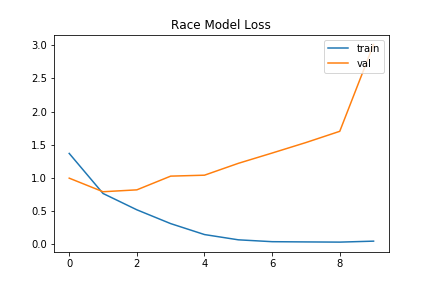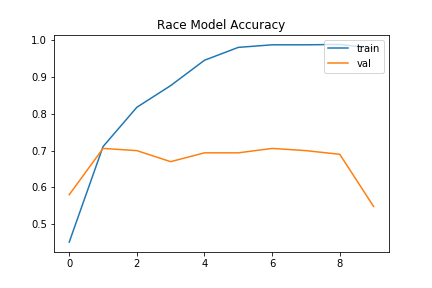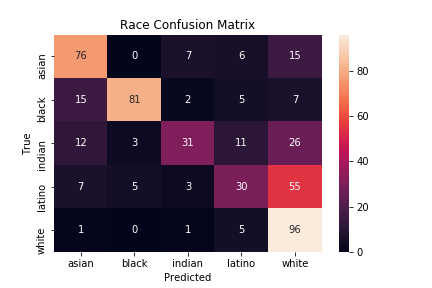

Improvement:
Here are a few ways to improve the model:
1. Use a larger dataset and train with a larger number of folder, epochs, and batch_size
2. Adjust and Add/Subtract the of layers of the Neural Nets (more research needs to be done here on how and what to adjust)
3. Can split the training of race base on gender (one model for race_male and one model for race_female). This will help identify the most discriminating features between race only. (This is the approach that I would take if I had more compute power. Since the gender model showed good accuracy, I would first send new (unlabeled) data to the gender model as an initial filter and then send the output to either the race_female or race_male model for race prediction)